In [1]:
!python -m pip install pandas
!python -m pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


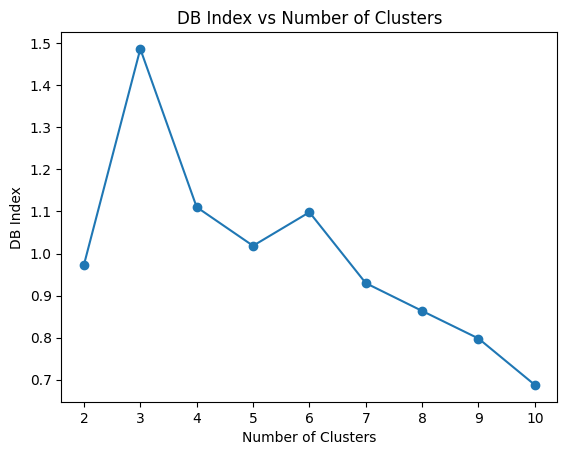

Optimal number of clusters: 10


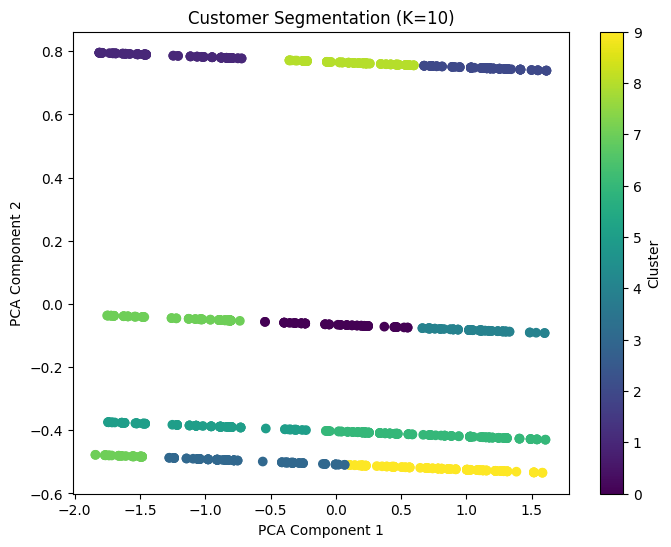

Final DB Index: 0.6877319843720061


In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score


customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')


data = pd.merge(transactions, customers, on='CustomerID')


encoder = OneHotEncoder(drop='first', sparse_output=False)  # Changed sparse to sparse_output
region_encoded = encoder.fit_transform(data[['Region']])
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['Region']))


data = pd.concat([data, region_df], axis=1)


numerical_features = data[['Price']].copy()


scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)


final_data = np.hstack([numerical_features_scaled, region_encoded])


db_indexes = []
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_data)
    db_index = davies_bouldin_score(final_data, kmeans.labels_)
    db_indexes.append(db_index)
    inertia_values.append(kmeans.inertia_)


plt.plot(range(2, 11), db_indexes, marker='o')
plt.title('DB Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.savefig(r'C:\Users\DELL\Downloads\plot_image6.png')
plt.show()


optimal_k = np.argmin(db_indexes) + 2
print(f'Optimal number of clusters: {optimal_k}')


kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(final_data)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(final_data)


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_optimal.labels_, cmap='viridis')
plt.title(f'Customer Segmentation (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.savefig(r'C:\Users\DELL\Downloads\plot_image7.png')
plt.show()


print(f'Final DB Index: {db_indexes[optimal_k - 2]}')
